<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
False    2935849
Name: date, dtype: int64
False    2935849
Name: date_block_num, dtype: int64
False    2935849
Name: shop_id, dtype: int64
False    2935849
Name: item_id, dtype: int64
False    2935849
Name: item_price, dtype: int64
False    2935849
Name: item_cnt_day, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-n

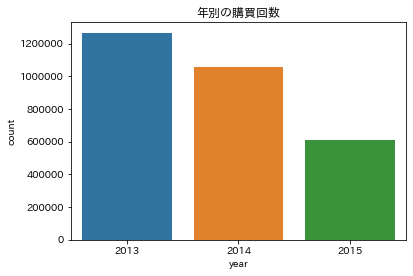

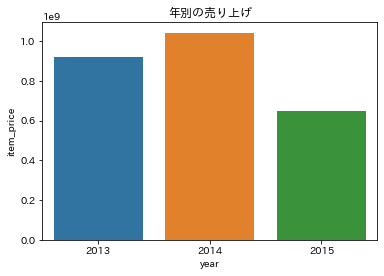

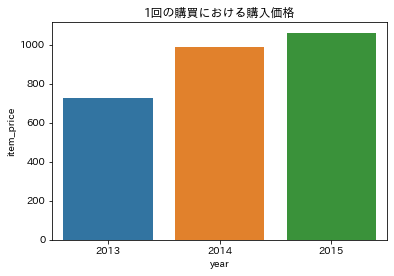

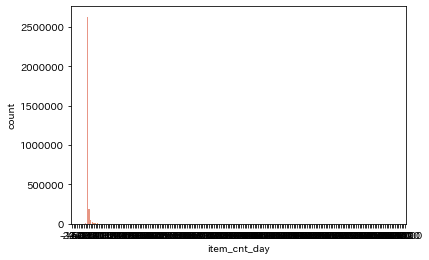

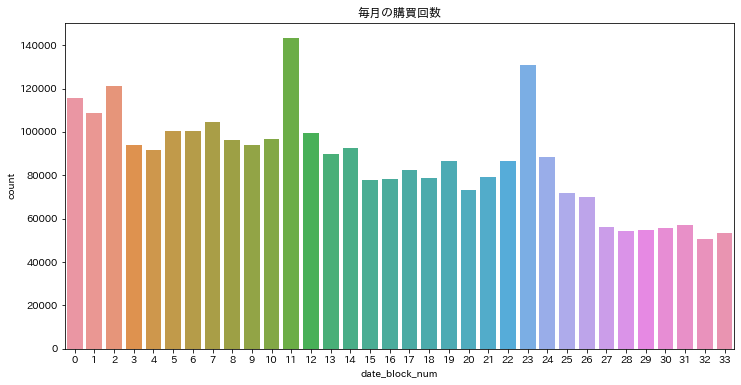

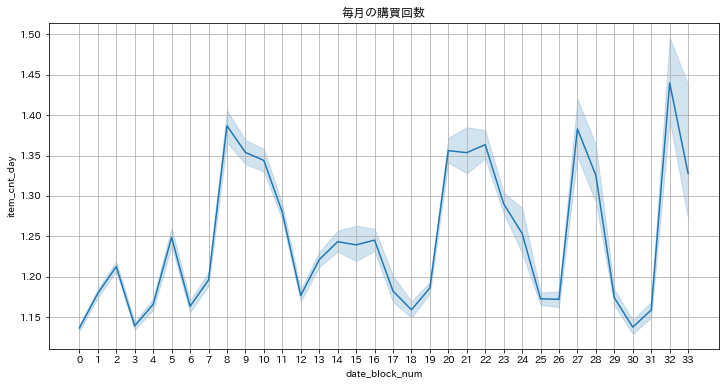

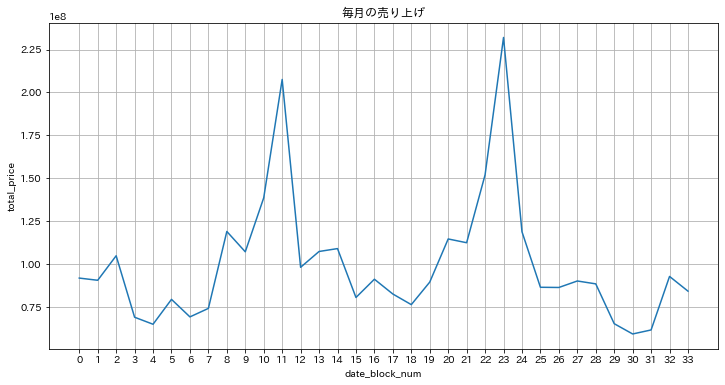

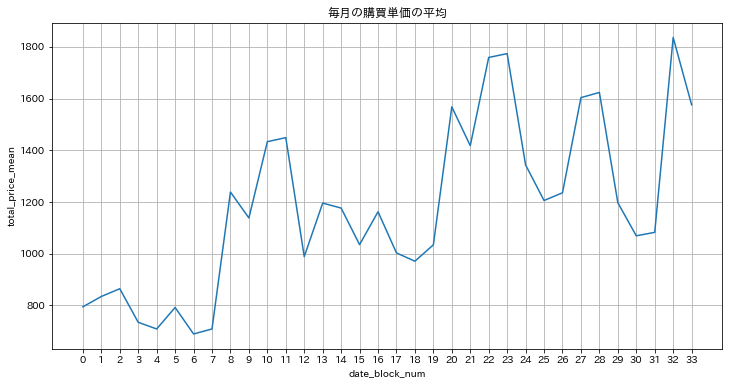

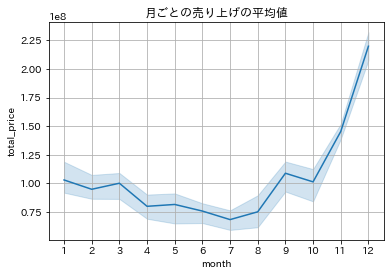

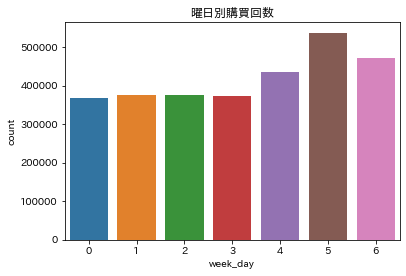

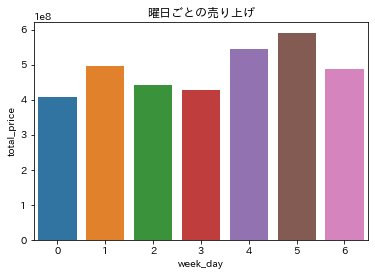

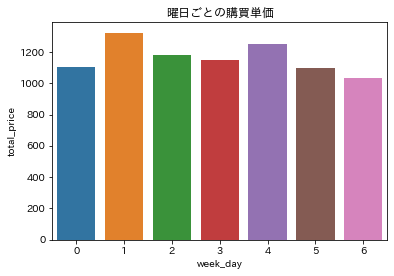

In [2]:
%run 002EDA-date.ipynb

# itemについて見てみる

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
0,2013-02-01,0,59,22154,999.00,1.0,2013,999.00,4
1,2013-03-01,0,25,2552,899.00,1.0,2013,899.00,4
2,2013-05-01,0,25,2552,899.00,-1.0,2013,-899.00,2
3,2013-06-01,0,25,2554,1709.05,1.0,2013,1709.05,5
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1099.00,1


In [4]:
train.item_id.value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [5]:
items.item_name.to_csv('item_name.csv', index=False)

## 一番売れている商品

In [6]:
items.loc[items.item_id == 20949] #シャツ…？

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [7]:
item_categories.loc[item_categories.item_category_id == 71]

,item_category_name,item_category_id
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71


In [8]:
shirts = train.loc[train.item_id == 20949]
shirts.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
352379,2013-04-30,3,22,20949,5.000000,12.0,2013,60.0,1
352399,2013-04-29,3,22,20949,4.923077,13.0,2013,64.0,0
352400,2013-04-28,3,22,20949,5.000000,4.0,2013,20.0,6
352401,2013-04-27,3,22,20949,5.000000,4.0,2013,20.0,5
352455,2013-04-24,3,22,20949,5.000000,2.0,2013,10.0,2


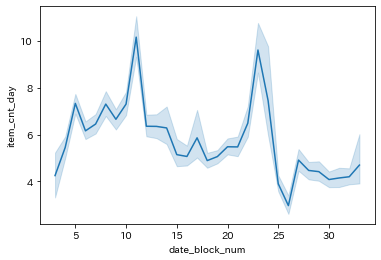

In [46]:
sns.lineplot(x='date_block_num', y='item_cnt_day', data=shirts) #一番売れた商品の個数の推移

## 商品ごとにグルーピング

In [10]:
item_group = train.groupby('item_id').sum().reset_index()
item_group

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
0,0,20,54,58.00,1.0,2014,58.00,3
1,1,108,330,26940.00,6.0,12084,26940.00,17
2,2,41,108,116.00,2.0,4028,116.00,9
3,3,37,108,158.00,2.0,4028,158.00,3
4,4,20,54,58.00,1.0,2014,58.00,4
...,...,...,...,...,...,...,...,...
21802,22165,23,110,118.00,2.0,4027,118.00,6
21803,22166,5042,14850,40500.00,348.0,543797,52200.00,750
21804,22167,20442,29872,331622.75,1320.0,2243628,393108.75,3288
21805,22168,12,127,4793.50,6.0,12078,4793.50,27


In [11]:
train.groupby('item_id', as_index=False).sum()[['item_price', 'item_cnt_day']]


,item_price,item_cnt_day
0,58.00,1.0
1,26940.00,6.0
2,116.00,2.0
3,158.00,2.0
4,58.00,1.0
...,...,...
21802,118.00,2.0
21803,40500.00,348.0
21804,331622.75,1320.0
21805,4793.50,6.0


In [12]:
item_group.sort_values('item_cnt_day', ascending=False) #売りが上回っている商品もある

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
20602,20949,554196,991373,1.540316e+05,187642.0,63118215,9.288637e+05,95577
2749,2808,87656,229967,7.475887e+06,17245.0,15059455,1.685278e+07,23368
3654,3732,96917,201958,1.756505e+07,16642.0,13038824,4.361798e+07,20718
17418,17717,203956,273979,9.924972e+06,15830.0,18264497,1.720083e+07,28522
5717,5822,158305,296575,9.984311e+06,14515.0,18947537,1.540898e+07,29302
...,...,...,...,...,...,...,...,...
7401,7547,36,108,6.780000e+03,0.0,4028,0.000000e+00,6
13223,13474,7,42,1.039800e+04,-1.0,2013,-1.039800e+04,4
17760,18062,1,16,4.999000e+03,-1.0,2013,-4.999000e+03,6
11664,11871,0,16,5.999000e+03,-1.0,2013,-5.999000e+03,0


In [13]:
best100_train = train.groupby('item_id', as_index=False).sum()[['item_id' , 'item_cnt_day' , 'total_price']]

best100_items = items.merge(best100_train.sort_values('item_cnt_day', ascending=False),
                            on='item_id').sort_values('item_cnt_day', ascending=False).iloc[0:101,:]

best100_items

,item_name,item_id,item_category_id,item_cnt_day,total_price
20602,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,187642.0,9.288637e+05
2749,"Diablo III [PC, Jewel, русская версия]",2808,30,17245.0,1.685278e+07
3654,"Grand Theft Auto V [PS3, русские субтитры]",3732,19,16642.0,4.361798e+07
17418,Прием денежных средств для 1С-Онлайн,17717,79,15830.0,1.720083e+07
5717,Playstation Store пополнение бумажника: Карта ...,5822,35,14515.0,1.540898e+07
...,...,...,...,...,...
5562,PS4: Камера (PlayStation Camera: CUH-ZEY1: SCEE),5663,3,3192.0,9.384248e+06
7647,"Watch_Dogs. Специальное издание [PC, русская в...",7805,28,3188.0,2.713034e+06
15773,Настольная игра World of Tanks Rush арт.1123,16056,64,3176.0,2.276317e+06
3359,"Far Cry 3 [PC, Jewel, русская версия]",3432,30,3169.0,1.821707e+06


In [14]:
best100_items.head(20)

,item_name,item_id,item_category_id,item_cnt_day,total_price
20602,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71,187642.0,9.288637e+05
2749,"Diablo III [PC, Jewel, русская версия]",2808,30,17245.0,1.685278e+07
3654,"Grand Theft Auto V [PS3, русские субтитры]",3732,19,16642.0,4.361798e+07
17418,Прием денежных средств для 1С-Онлайн,17717,79,15830.0,1.720083e+07
5717,Playstation Store пополнение бумажника: Карта ...,5822,35,14515.0,1.540898e+07
3656,"Grand Theft Auto V [Xbox 360, русские субтитры]",3734,23,11688.0,3.106516e+07
6543,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,12,10289.0,2.193915e+08
3653,"Grand Theft Auto V [PC, русские субтитры]",3731,30,10099.0,1.998348e+07
1814,"Battlefield 4 [PC, русская версия]",1855,30,10032.0,9.357025e+06
16493,"Одни из нас [PS3, русская версия]",16787,19,9227.0,2.190784e+07


In [15]:
best100_items['item_name'].to_csv('best100_items.csv', index=False)

In [16]:
best100_items_en = pd.read_csv('../sale-prediction/best100_items_en.csv')#翻訳後のもの

In [17]:
best100_items_en

,item_name
0,Corporate package shirt 1C Interest white (34 ...
1,"""Minecraft Series 1 Player Survival Pack 3 Fig..."
2,"""Diablo III [PC, Jewel, Russian version]"""
3,"""Grand Theft Auto V [PS3, Russian subtitles]"""
4,Acceptance of funds for 1C-Online
...,...
92,"""UFC [PS4, English version]"""
93,"""Myal-toy"" ""Angry birds"" ""in assortment (1 pc.)"""
94,"""S.T.A.L.K.E.R .: Call of Pripyat [PC, Jewel, ..."
95,Assassin's Creed IV. Black flag. Collector's E...


In [18]:
best100_items.item_category_id.value_counts()

30    34
28    15
20     9
23     8
19     7
35     4
40     3
3      3
65     2
70     2
75     2
9      2
6      2
83     2
64     1
79     1
71     1
72     1
12     1
8      1
Name: item_category_id, dtype: int64

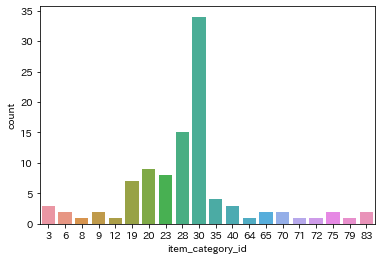

In [19]:
sns.countplot(x='item_category_id',data=best100_items)

In [20]:
item_categories.loc[item_categories['item_category_id'] == 30] #PC Games - Standard Editions

,item_category_name,item_category_id
30,Игры PC - Стандартные издания,30


In [21]:
item_categories.loc[item_categories['item_category_id'] == 28] #PC Games - Additional Editions

,item_category_name,item_category_id
28,Игры PC - Дополнительные издания,28


In [22]:
item_categories.loc[item_categories['item_category_id'] == 20] #Games - PS4

,item_category_name,item_category_id
20,Игры - PS4,20


In [23]:
item_categories.loc[item_categories['item_category_id'] == 23] #Games - XBOX 360

,item_category_name,item_category_id
23,Игры - XBOX 360,23


In [24]:
item_categories.loc[item_categories['item_category_id'] == 19] #Games - PS3

,item_category_name,item_category_id
19,Игры - PS3,19


In [25]:
item_categories.loc[item_categories['item_category_id'] == 35] #Payment Cards - PSN

,item_category_name,item_category_id
35,Карты оплаты - PSN,35


In [26]:
train.loc[train.item_id == 2808] #standard edisionsの例

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
91,2013-02-01,0,25,2808,999.0,2.0,2013,1998.0,4
92,2013-03-01,0,25,2808,999.0,2.0,2013,1998.0,4
93,2013-04-01,0,25,2808,999.0,1.0,2013,999.0,0
94,2013-07-01,0,25,2808,999.0,1.0,2013,999.0,0
95,2013-08-01,0,25,2808,999.0,2.0,2013,1998.0,3
...,...,...,...,...,...,...,...,...,...
2924805,2015-12-10,33,26,2808,1499.0,1.0,2015,1499.0,3
2928833,2015-10-18,33,24,2808,1499.0,1.0,2015,1499.0,6
2934603,2015-10-10,33,25,2808,1499.0,1.0,2015,1499.0,5
2934604,2015-06-10,33,25,2808,1499.0,1.0,2015,1499.0,2


In [27]:
train.loc[train.item_id == 2814] #aditional edisionsの例

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,total_price,week_day
1551364,2014-04-30,15,56,2814,899.0,1.0,2014,899.0,2
1551366,2014-04-28,15,56,2814,899.0,1.0,2014,899.0,0
1551367,2014-04-22,15,56,2814,899.0,1.0,2014,899.0,1
1551368,2014-04-20,15,56,2814,899.0,2.0,2014,1798.0,6
1551369,2014-04-19,15,56,2814,899.0,4.0,2014,3596.0,5
...,...,...,...,...,...,...,...,...,...
2453961,2015-12-02,25,24,2814,899.0,1.0,2015,899.0,2
2473208,2015-02-18,25,30,2814,719.0,1.0,2015,719.0,2
2476903,2015-05-02,25,25,2814,899.0,1.0,2015,899.0,5
2483116,2015-07-02,25,27,2814,899.0,1.0,2015,899.0,3


## 12月に売れているアイテムは？

In [28]:
train_12 = train.loc[train.date_block_num.mod(12) == 11]

In [29]:
items_12 = train_12.groupby('item_id').sum().reset_index()
items_12.sort_values('item_cnt_day', ascending=False)

,item_id,date_block_num,shop_id,item_price,item_cnt_day,year,total_price,week_day
11086,20949,42760,79983,1.228552e+04,24742.0,5041820,1.223175e+05,7705
3370,6675,9244,22111,1.657748e+07,2171.0,1441422,5.047452e+07,2083
9322,17717,20908,29010,1.190429e+06,2094.0,1901149,2.580672e+06,3004
794,1855,13818,31740,9.441887e+05,1965.0,1968969,1.846176e+06,3019
1796,3732,11564,27681,2.324173e+06,1561.0,1699162,4.216683e+06,2618
...,...,...,...,...,...,...,...,...
10293,19493,23,12,1.549000e+03,-1.0,2014,-1.549000e+03,5
5164,10156,23,42,7.499000e+03,-1.0,2014,-7.499000e+03,2
3451,6850,23,17,1.199900e+04,-1.0,2014,-1.199900e+04,6
11194,21299,11,12,1.299000e+03,-1.0,2013,-1.299000e+03,1


In [30]:
best100_items_12 = items_12.sort_values('item_cnt_day', ascending=False).iloc[:101, [0, 4]]
best100_items_12 = pd.merge(best100_items_12, items, on='item_id')
best100_items_12.head()

,item_id,item_cnt_day,item_name,item_category_id
0,20949,24742.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71
1,6675,2171.0,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12
2,17717,2094.0,Прием денежных средств для 1С-Онлайн,79
3,1855,1965.0,"Battlefield 4 [PC, русская версия]",30
4,3732,1561.0,"Grand Theft Auto V [PS3, русские субтитры]",19


In [31]:
best100_items_12.item_category_id.value_counts()

20    12
28    12
30    12
19    12
23     9
40     7
3      5
35     4
69     4
6      2
55     2
65     2
12     2
70     2
75     2
7      1
16     1
9      1
83     1
31     1
79     1
37     1
62     1
63     1
64     1
71     1
2      1
Name: item_category_id, dtype: int64

In [32]:
item_categories.loc[item_categories['item_category_id'] == 20] #Games - PS4

,item_category_name,item_category_id
20,Игры - PS4,20


In [33]:
item_categories.loc[item_categories['item_category_id'] == 28] #PC Games - Additional Editions

,item_category_name,item_category_id
28,Игры PC - Дополнительные издания,28


In [34]:
item_categories.loc[item_categories['item_category_id'] == 30] #PC Games - Standard Editions

,item_category_name,item_category_id
30,Игры PC - Стандартные издания,30


In [35]:
item_categories.loc[item_categories['item_category_id'] == 19] #Games - PS3

,item_category_name,item_category_id
19,Игры - PS3,19


In [36]:
item_categories.loc[item_categories['item_category_id'] == 23] #Games - XBOX 360

,item_category_name,item_category_id
23,Игры - XBOX 360,23


In [37]:
item_categories.loc[item_categories['item_category_id'] == 40] #Cinema - DVD

,item_category_name,item_category_id
40,Кино - DVD,40


## priceとitem_cnt_dayには負の相関があるのではないか

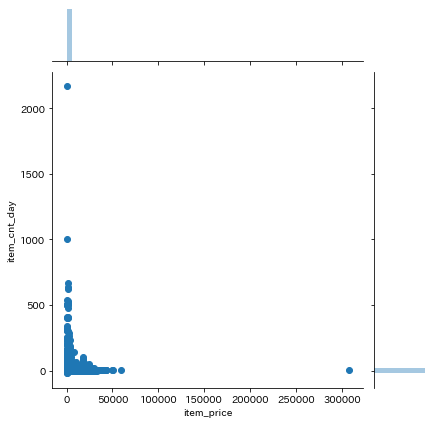

In [38]:
sns.jointplot('item_price', 'item_cnt_day', data=train)

In [39]:
train.iloc[train.item_price.idxmax(),:]

date              2013-12-13 00:00:00
date_block_num                     11
shop_id                            12
item_id                          6066
item_price                     307980
item_cnt_day                        1
year                             2013
total_price                    307980
week_day                            4
Name: 1163158, dtype: object

In [40]:
items.loc[items.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [41]:
train.iloc[train.item_cnt_day.idxmax(),:]

date              2015-10-28 00:00:00
date_block_num                     33
shop_id                            12
item_id                         11373
item_price                   0.908714
item_cnt_day                     2169
year                             2015
total_price                      1971
week_day                            2
Name: 2909818, dtype: object

In [42]:
items.loc[items.item_id == 11373]

,item_name,item_id,item_category_id
11373,Доставка до пункта выдачи (Boxberry),11373,9


In [43]:
items = items.merge(item_categories, on='item_category_id')
items.head()
#面倒なのでくっつけた

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


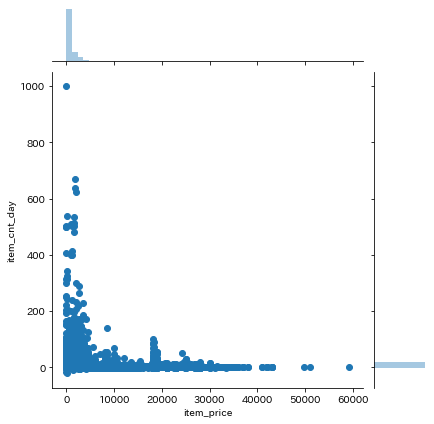

In [44]:
train_d = train.drop(train.index[[1163158, 2909818]])
sns.jointplot('item_price', 'item_cnt_day', data=train_d)

In [45]:
train_d.item_price.corr(train_d.item_cnt_day) #なかったけど、、、

0.013030052321694597